# Ecuaciones Diferenciales Ordinarias

Una ecuación diferencial es una ecuación que expresa la relación entre una función y sus derivadas.

Cuando la función $f(x)$ depende únicamente de una variable $x \in \mathbb R$ definida en una dimensión, entonces la ecuación se dice **ordinaria**.

$$F\left(x, f(x), \frac{df(x)}{dx}, \frac{d^2f(x)}{dx^2}, \frac{d^3f(x)}{dx^3}, \ldots, \frac{d^{n-1}f(x)}{dx^{n-1}}\right) = \frac{d^{n}f(x)}{dx^{n}}$$

Donde $n$ es el orden de la EDO.

## EDO de primer orden

Por ejemplo, supongamos que contamos con la siguiente EDO:

$$\frac{df(t)}{dt} = e^{-t}$$

con valor inicial $f(0)=-1$

Esta ecuación tiene solución analítica $f(t)=- e^{-t}$, sin embargo para efectos de demostración vamos a utilizar el método de Euler para resolver la EDO. 

$$f(t_{j+1}) = f(t_j) + h F(t_j,f(t_j))$$

Donde $h$ es el tamaño del intervalo.

In [39]:
function euler(F::Function, tspan::Tuple{Float64,Float64}, y0::Float64, h::Float64)
    t_out = tspan[1]:h:tspan[2]
    y_out = zeros(length(t_out))
    y_out[1]=y0	
	for i=1:length(y_out)-1
		y_out[i+1]= y_out[i] + h*F(t_out[i], y_out[i])
	end
    return (t_out, y_out)
end

euler (generic function with 1 method)

In [45]:
F(t,s)=exp(-t);
tspan=(0.0,1.1);
h=0.1;
y0=-1.0;
t_out,y_out=euler(F,tspan,y0,h);

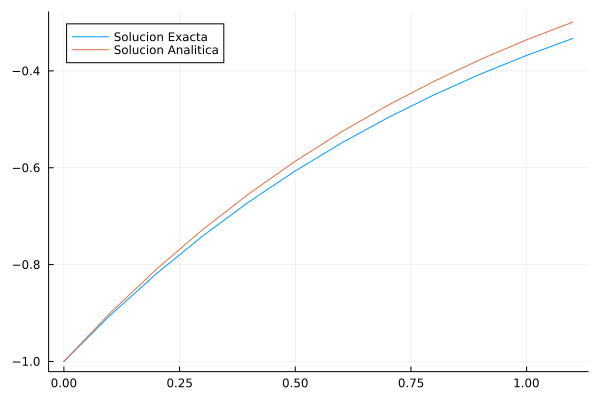

In [46]:
using Plots

y_exact(t)=-exp(-t)

plot(t_out,y_exact.(t_out),label="Solucion Exacta")
plot!(t_out,y_out,label="Solucion Analitica")


In [47]:
using DataFrames

sol_exacta=y_exact.(t_out)
error=abs.(sol_exacta-y_out)
df= DataFrame(t=t_out,analitica=sol_exacta,numerica=y_out,error=error)

Row,t,analitica,numerica,error
,Float64,Float64,Float64,Float64
1,0.0,-1.0,-1.0,0.0
2,0.1,-0.904837,-0.9,0.00483742
3,0.2,-0.818731,-0.809516,0.00921449
4,0.3,-0.740818,-0.727643,0.013175
5,0.4,-0.67032,-0.653561,0.0167587
6,0.5,-0.606531,-0.586529,0.0200013
7,0.6,-0.548812,-0.525876,0.0229353
8,0.7,-0.496585,-0.470995,0.0255902
9,0.8,-0.449329,-0.421337,0.0279924


In [50]:
h=0.01;
y0=-1.0;
t_out_001,y_out_001=euler(F,tspan,y0,h);
sol_exacta_001=y_exact.(t_out_001)
error_001=abs.(sol_exacta_001-y_out_001)
df_001= DataFrame(t=t_out_001,analitica=sol_exacta_001,numerica=y_out_001,error=error_001)

Row,t,analitica,numerica,error
,Float64,Float64,Float64,Float64
1,0.0,-1.0,-1.0,0.0
2,0.01,-0.99005,-0.99,4.98337e-5
3,0.02,-0.980199,-0.9801,9.91716e-5
4,0.03,-0.970446,-0.970298,0.000148019
5,0.04,-0.960789,-0.960593,0.00019638
6,0.05,-0.951229,-0.950985,0.000244259
7,0.06,-0.941765,-0.941473,0.000291663
8,0.07,-0.932394,-0.932055,0.000338594
9,0.08,-0.923116,-0.922731,0.000385059


In [7]:
import Pkg; 

Pkg.add("DifferentialEquations")

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


   Installed Polyester ───────────────── v0.7.9


   Installed EnumX ───────────────────── v1.0.4
   Installed TriangularSolve ─────────── v0.1.20


   Installed BoundaryValueDiffEq ─────── v5.4.0
   Installed Accessors ───────────────── v0.1.33
   Installed SteadyStateDiffEq ───────── v1.16.1
   Installed Tricks ──────────────────── v0.1.8
   Installed FiniteDiff ──────────────── v2.21.1
   Installed RecursiveArrayTools ─────── v2.38.10


   Installed NonlinearSolve ──────────── v2.8.1
   Installed DifferentialEquations ───── v7.11.0


   Installed SimpleUnPack ────────────── v1.1.0


   Installed DiffEqBase ──────────────── v6.140.1
   Installed LinearSolve ─────────────── v2.20.0
   Installed SciMLBase ───────────────── v2.8.2
   Installed SciMLNLSolve ────────────── v0.1.9
   Installed Functors ────────────────── v0.4.5
   Installed BandedMatrices ──────────── v1.2.1


   Installed ADTypes ─────────────────── v0.2.5
   Installed SimpleNonlinearSolve ────── v0.1.25


   Installed NLSolversBase ───────────── v7.8.3
   Installed Random123 ───────────────── v1.6.1


   Installed DiffEqNoiseProcess ──────── v5.19.0
   Installed OrdinaryDiffEq ──────────── v6.59.2
   Installed Lazy ────────────────────── v0.15.1
   Installed ExprTools ───────────────── v0.1.10
   Installed JumpProcesses ───────────── v9.8.0


   Installed ArrayLayouts ────────────── v1.4.3
   Installed FunctionWrappersWrappers ── v0.1.3


   Installed LatticeRules ────────────── v0.0.1
   Installed StochasticDiffEq ────────── v6.63.2
   Installed QuasiMonteCarlo ─────────── v0.3.3
   Installed SciMLOperators ──────────── v0.3.7
   Installed DiffEqCallbacks ─────────── v2.34.0


   Installed DelayDiffEq ─────────────── v5.43.1
   Installed Sundials ────────────────── v4.20.1
   Installed EnzymeCore ──────────────── v0.6.3
   Installed FastLapackInterface ─────── v2.0.0


   Installed PreallocationTools ──────── v0.4.12
   Installed KLU ─────────────────────── v0.4.1
   Installed CompositionsBase ────────── v0.1.2
   Installed PackageExtensionCompat ──── v1.0.2


   Installed InverseFunctions ────────── v0.1.12


   Installed ExponentialUtilities ────── v1.25.0
   Installed GPUArraysCore ───────────── v0.1.5
   Installed Sobol ───────────────────── v1.5.0
   Installed StrideArraysCore ────────── v0.5.1
   Installed IntegerMathUtils ────────── v0.1.2
   Installed RuntimeGeneratedFunctions ─ v0.5.12


   Installed Krylov ──────────────────── v0.9.4
   Installed TruncatedStacktraces ────── v1.4.0
   Installed Primes ──────────────────── v0.5.5
   Installed ConcreteStructs ─────────── v0.2.3
   Installed PoissonRandom ───────────── v0.4.4
   Installed SymbolicIndexingInterface ─ v0.2.2


   Installed FastBroadcast ───────────── v0.2.8
   Installed Optim ───────────────────── v1.7.8
   Installed RecursiveFactorization ──── v0.2.21


   Installed Sparspak ────────────────── v0.3.9


   Installed SparseDiffTools ─────────── v2.13.0


    Updating `~/.julia/environments/v1.9/Project.toml`
  [0c46a032] + DifferentialEquations v7.11.0
    Updating `~/.julia/environments/v1.9/Manifest.toml`
 

 [47edcb42] + ADTypes v0.2.5
  [7d9f7c33] + Accessors v0.1.33
  [4c555306] + ArrayLayouts v1.4.3
  [aae01518] + BandedMatrices v1.2.1
  [764a87c0] + BoundaryValueDiffEq v5.4.0
  [a33af91c] + CompositionsBase v0.1.2
  [2569d6c7] + ConcreteStructs v0.2.3
  [bcd4f6db] + DelayDiffEq v5.43.1
  [2b5f629d] + DiffEqBase v6.140.1
  [459566f4] + DiffEqCallbacks v2.34.0
  [77a26b50] + DiffEqNoiseProcess v5.19.0
  [0c46a032] + DifferentialEquations v7.11.0
  [4e289a0a] + EnumX v1.0.4
  [f151be2c] + EnzymeCore v0.6.3
  [d4d017d3] + ExponentialUtilities v1.25.0
  [e2ba6199] + ExprTools v0.1.10
  [7034ab61] + FastBroadcast v0.2.8
  [9aa1b823] + FastClosures v0.3.2
  [29a986be] + FastLapackInterface v2.0.0
  [6a86dc24] + FiniteDiff v2.21.1
  [069b7b12] + FunctionWrappers v1.1.3
  [77dc65aa] + FunctionWrappersWrappers v0.1.3
  [d9f16b24] + Functors v0.4.5
  [46192b85] + GPUArraysCore v0.1.5
  [c145ed77] + GenericSchur v0.5.3
  [18e54dd8] + IntegerMathUtils v0.1.2
  [3587e190] + InverseFunctions v0.1.12

Precompiling 

project...


  ✓ MuladdMacro
  ✓ ConcreteStructs
  ✓ ExprTools


  ✓ ADTypes


  ✓ LatticeRules


  ✓ PositiveFactorizations
  ✓ SimpleUnPack


  ✓ Tricks
  ✓ FunctionWrappers


  ✓ IntegerMathUtils


  ✓ PoissonRandom
  ✓ InverseFunctions


  ✓ CompositionsBase


  ✓ EnumX


  ✓ TreeViews
  ✓ GenericSchur


  ✓ SymbolicIndexingInterface


  ✓ PackageExtensionCompat


  ✓ FastClosures


  ✓ TruncatedStacktraces


  ✓ KLU


  ✓ Functors


  ✓ FastLapackInterface
  ✓ RandomNumbers


  ✓ Sobol


  ✓ GPUArraysCore


  ✓ Lazy
  ✓ Sundials_jll


  ✓ ResettableStacks


  ✓ EnzymeCore


  ✓ RuntimeGeneratedFunctions


  ✓ VertexSafeGraphs


  ✓ Sparspak


  ✓ FunctionWrappersWrappers


  ✓ LogExpFunctions → LogExpFunctionsInverseFunctionsExt


  ✓ Primes


  ✓ Unitful → InverseFunctionsUnitfulExt


  ✓ CompositionsBase → CompositionsBaseInverseFunctionsExt


  ✓ ArrayInterface → ArrayInterfaceGPUArraysCoreExt


  ✓ Random123


  ✓ Krylov


  ✓ Accessors


  ✓ StatsBase


  ✓ SpecialFunctions


  ✓ Accessors → AccessorsIntervalSetsExt


  ✓ Accessors → AccessorsStaticArraysExt


  ✓ LevyArea


  ✓ DiffRules


  ✓ MultivariateStats


  ✓ Clustering


  ✓ DualNumbers
  ✓ SpecialFunctions → SpecialFunctionsChainRulesCoreExt


  ✓ QuasiMonteCarlo


  ✓ HypergeometricFunctions


  ✓ ColorVectorSpace


  ✓ StatsFuns
  ✓ ForwardDiff


  ✓ ArrayLayouts


  ✓ StatsFuns → StatsFunsInverseFunctionsExt


  ✓ Roots → RootsForwardDiffExt


  ✓ ForwardDiff → ForwardDiffStaticArraysExt


  ✓ StatsFuns → StatsFunsChainRulesCoreExt


  ✓ ArrayLayouts → ArrayLayoutsSparseArraysExt
  ✓ PreallocationTools


  ✓ ColorSchemes


  ✓ Distributions


  ✓ Distributions → DistributionsTestExt


  ✓ Distributions → DistributionsChainRulesCoreExt


  ✓ QuasiMonteCarlo → QuasiMonteCarloDistributionsExt


  ✓ PlotUtils


  ✓ ExponentialUtilities


  ✓ PlotThemes


  ✓ RecipesPipeline


  ✓ BandedMatrices


  ✓ BandedMatrices → BandedMatricesSparseArraysExt


  ✓ ArrayInterface → ArrayInterfaceBandedMatricesExt


  ✓ ImageCore


  ✓ FiniteDiff


  ✓ StaticArrayInterface


  ✓ RecursiveArrayTools


  ✓ ImageDraw


  ✓ SciMLOperators


  ✓ JpegTurbo


  ✓ FiniteDiff → FiniteDiffStaticArraysExt


  ✓ NLSolversBase
  ✓ ImageBase


  ✓ Sixel


  ✓ StaticArrayInterface → StaticArrayInterfaceOffsetArraysExt


  ✓ CloseOpenIntervals


  ✓ LayoutPointers


  ✓ StaticArrayInterface → StaticArrayInterfaceStaticArraysExt


  ✓ FiniteDiff → FiniteDiffBandedMatricesExt


  ✓ ImageMagick


  ✓ HistogramThresholding


  ✓ PNGFiles


  ✓ LineSearches


  ✓ ImageShow


  ✓ SparseDiffTools


  ✓ ImageAxes


  ✓ TiledIteration


  ✓ StrideArraysCore


  ✓ ImageTransformations


  ✓ NLsolve


  ✓ Polyester
  ✓ ImageBinarization


  ✓ ImageMetadata


  ✓ Optim


  ✓ FastBroadcast


  ✓ SciMLBase


  ✓ Netpbm


  ✓ ImageContrastAdjustment


  ✓ ImageIO


  ✓ SciMLBase → SciMLBaseChainRulesCoreExt


  ✓ SciMLBase → SciMLBasePyCallExt


  ✓ TestImages


  ✓ VectorizationBase


  ✓ DiffEqBase


  ✓ SLEEFPirates


  ✓ DiffEqBase → DiffEqBaseChainRulesCoreExt


  ✓ SciMLNLSolve


  ✓ DiffEqCallbacks


  ✓ DiffEqBase → DiffEqBaseDistributionsExt


  ✓ DiffEqBase → DiffEqBaseUnitfulExt


  ✓ SteadyStateDiffEq


  ✓ JumpProcesses


  ✓ DiffEqNoiseProcess


  ✓ JumpProcesses → JumpProcessFastBroadcastExt


  ✓ SimpleNonlinearSolve


  ✓ Sundials


  ✓ LoopVectorization


  ✓ LoopVectorization → SpecialFunctionsExt


  ✓ LoopVectorization → ForwardDiffExt


  ✓ ImageMorphology


  ✓ TriangularSolve


  ✓ ImageDistances


  ✓ RecursiveFactorization


  ✓ Plots


  ✓ Plots → FileIOExt


  ✓ Plots → UnitfulExt


  ✓ ImageFiltering


  ✓ ImageEdgeDetection


  ✓ ImageSegmentation


  ✓ ImageCorners


  ✓ ImageQualityIndexes


  ✓ LinearSolve


  ✓ Images


  ✓ LinearSolve → LinearSolveRecursiveArrayToolsExt


  ✓ LinearSolve → LinearSolveBandedMatricesExt


  ✓ ImageFeatures


  ✓ NonlinearSolve


  ✓ NonlinearSolve → NonlinearSolveBandedMatricesExt


  ✓ OrdinaryDiffEq


  ✓ DelayDiffEq


  ✓ StochasticDiffEq


  ✓ BoundaryValueDiffEq


  ✓ BoundaryValueDiffEq → BoundaryValueDiffEqOrdinaryDiffEqExt


  ✓ DifferentialEquations
  157 dependencies successfully precompiled in 409 seconds. 255 already precompiled.
  8 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


In [52]:
using DifferentialEquations

f(u,p,t) = exp(-t)
u0 = -1.0
tspan = (0.0,1.1);
prob = ODEProblem(f,u0,tspan);
sol = solve(prob,Trapezoid());

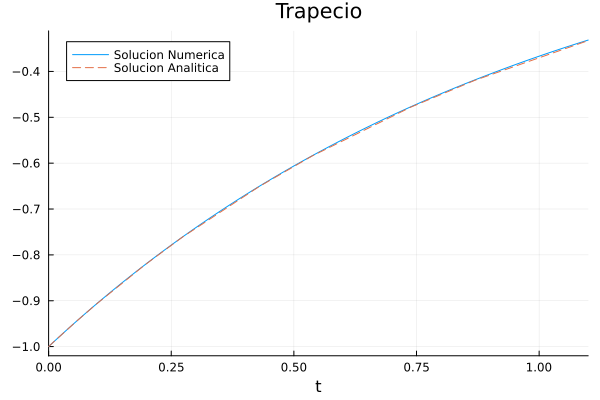

In [54]:
plot(sol,label="Solucion Numerica",title="Trapecio") # legend=false
plot!(sol.t,t->-exp(-t),ls=:dash,label="Solucion Analitica")

# 2. Ecuaciones Diferenciales de 2do Orden

La ecuación diferencial para un pendulo de largo $l$ y masa $m$ es:

$$ml\frac{d^2\Theta(t)}{dt^2} = -mg \sin(\Theta(t)).$$

Si el angulo $\Theta \approx \sin(\Theta)$ es pequeño, podemos hacer la siguiente aproximación:

$$l\frac{d^2\Theta(t)}{dt^2} = -g\Theta(t)$$

In [55]:
# Constants
const g = 9.81;
const L = 1.0;

#Initial Conditions
u_0 = [π/2,0];
tspan = (0.0,6.3);

#Define the problem
function simplependulum(du,u,p,t)
    θ  = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g/L)*sin(θ)
    return du
end



simplependulum (generic function with 1 method)

In [59]:
function euler_segundo_orden(F::Function, tspan::Tuple{Float64,Float64}, y0::Vector{Float64}, h::Float64)
    t_out = tspan[1]:h:tspan[2]
    y_out = zeros(2,length(t_out))
    y_out[1,1]=y0[1]
    y_out[2,1]=y0[2]		
	for i=1:length(t_out)-1
		y_out[:,i+1]= y_out[:,i] + h*F(t_out[i], y_out[:,i])
	end
    return (t_out, y_out)
end

euler_segundo_orden (generic function with 1 method)

In [110]:
F(t,s)=simplependulum([0.0,0.0],s,0.0,t)
h=0.001
t_out,y_out=euler_segundo_orden(F,tspan,u_0,h);

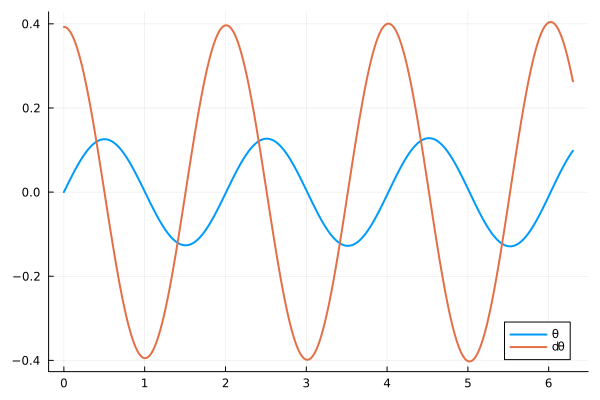

In [111]:
plot(t_out,y_out[1,:],linewidth=2,label="\\theta")
plot!(t_out,y_out[2,:],linewidth=2,label="d\\theta")

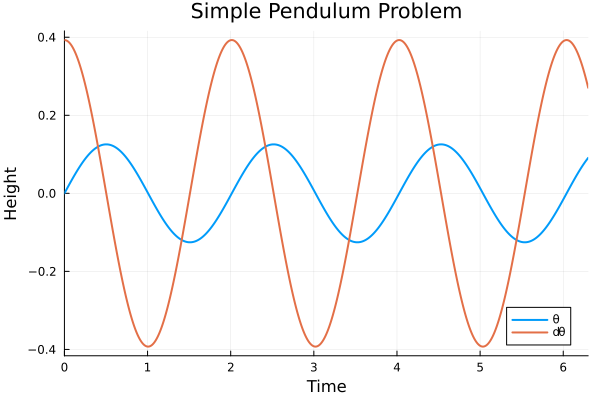

In [107]:
prob = ODEProblem(simplependulum, u_0, tspan)
sol = solve(prob,Trapezoid())

#Plot
plot(sol,linewidth=2,title ="Simple Pendulum Problem", xaxis = "Time", yaxis = "Height", label = ["\\theta" "d\\theta"])

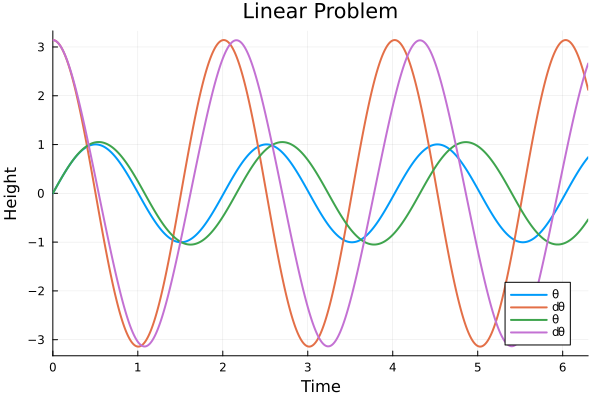

In [114]:
function linearpendulum(du,u,p,t)
    θ  = u[1]
    dθ = u[2]
    du[1] = dθ
    du[2] = -(g/L)*θ
    return du
end

#Initial Conditions
u_0 = [0,π];
tspan = (0.0,6.3);
prob = ODEProblem(simplependulum, u_0, tspan)
prob_linear = ODEProblem(linearpendulum, u_0, tspan)

sol = solve(prob,Trapezoid())
sol_linear = solve(prob_linear, Trapezoid())

#Plot
plot(sol_linear, linewidth = 2, title = "Linear Problem", xaxis = "Time",
    yaxis = "Height", label = ["\\theta" "d\\theta"])
plot!(sol, linewidth = 2, xaxis = "Time",
    yaxis = "Height", label = ["\\theta" "d\\theta"])

Formamos un sistema de ecuaciones del tipo 
$\dfrac{d \Theta}{d t}=\mathbf{F}(t, \Theta), \quad \Theta(0)=\left(\begin{array}{c} 
\theta_{0} \\ 
0 
\end{array}\right)$

$F(t, \Theta)=\left(\begin{array}{c} \omega(t) \\ -\dfrac{g}{L} \sin \theta(t) \end{array}\right)$

La solucion del sistema usando el método de Euler es:

$\Theta_{i+1}=\Theta_{i+1}+h \mathbf{F}\left(t_{i}, \Theta_{i}\right)$

El cual puede ser descompuesto como:


$\begin{aligned} \theta_{i+1} &=\theta_{i}+h \omega_{i} \\ \omega_{i+1} &=\omega_{i}-h \dfrac{g}{L} \sin \theta_{i} \end{aligned}$

[Fuente](https://math.libretexts.org/Bookshelves/Differential_Equations/A_First_Course_in_Differential_Equations_for_Scientists_and_Engineers_(Herman)/03%3A_Numerical_Solutions/3.05%3A_Numerical_Applications/3.5.01%3A_The_Nonlinear_Pendulum)

# Tarea

1.) Encuentre la solución numerica para el pendulo usando el método de Euler.

2.) Compruebe los valores y compare los resultados con el método lineal.

3.) Utilice el valor inicial $u₀=\pi$ y compruebe los resultados.